## LGM Internship Task 1

Iris Flowers Classification ML Project :

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Dataset Information
The iris flower data set contains 3 classes(setosa, versicolour, virginica)

This dataset have following attributes:
    
    1.Sepal length in cm
    2.Sepal width in cm
    3.Petal length in cm
    4.Petal width in cm
    5.Classes- iris-setosa, iris-versicolour, iris-virginica

## Importing important modules
We will first start by importing important modules we require in this task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder #We will use this further to convert flower names to numbers
import seaborn as sns #Seaborn sits on top of matplotlib which provides advanced visualizations
sns.set()

## Importing Dataset

We have downloaded the iris dataset from given link and now we will import it here and convert it to Pandas Dataframe

In [2]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','flower']
data = pd.read_csv('iris.data', names=column_names)
df = pd.DataFrame(data)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We have imported our data and converted it into pandas dataframe.

## We will see stats about the data and its info to get more information

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   flower        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Now, we will see the number of samples of each flower.

In [5]:
df['flower'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: flower, dtype: int64

## Preprocessing the data

In this step we will first analyze and clean the data

We will start by checking for null values

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
flower          0
dtype: int64

Luckily we have no null values, so we are good to go!

## Explore the data

We will explore the data by using different graphs that are provided by seaborn library

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

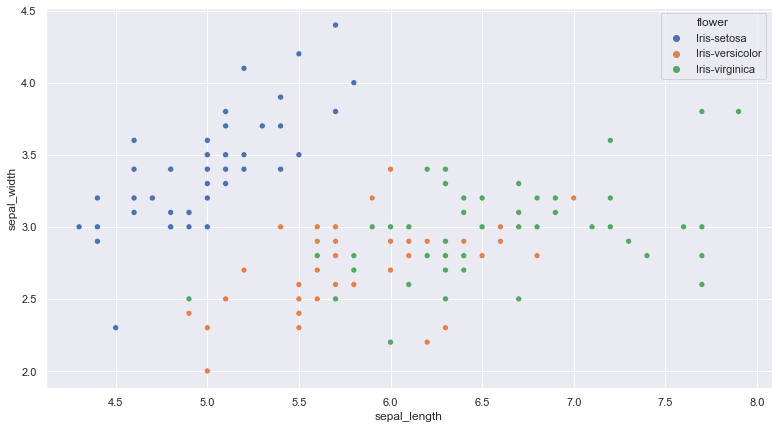

In [7]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='flower', data = df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

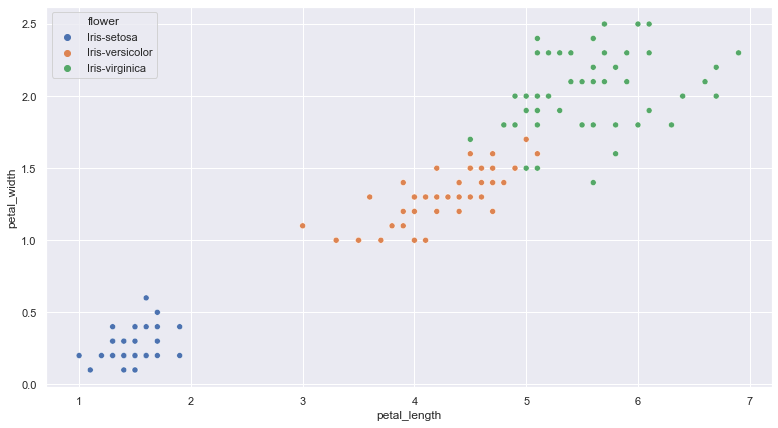

In [8]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='petal_length', y='petal_width', hue='flower', data = df)

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

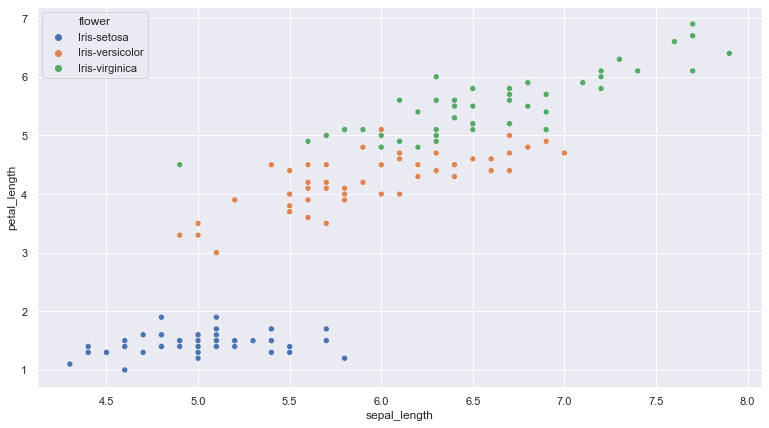

In [9]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='sepal_length', y='petal_length', hue='flower', data = df)

<AxesSubplot:xlabel='sepal_width', ylabel='petal_width'>

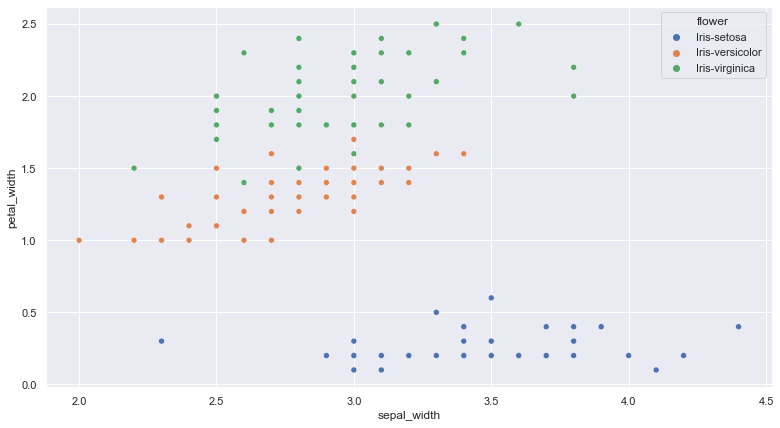

In [10]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='sepal_width', y='petal_width', hue='flower', data = df)

From above plots we can see that iris-setosa is seperately clustered from rest of species but versicolour and virginica are not totally seperately clustered.

We can visualize that petal length and petal width are the best attributes for clustering as they can be clustered easily.

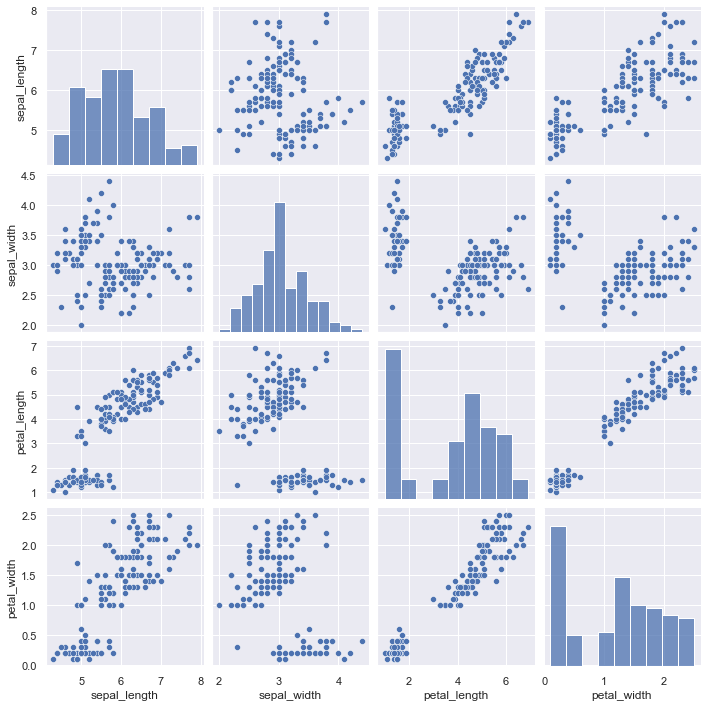

In [11]:
sns.pairplot(df)

From above graph we can get the idea of how different attributes are related to each other and also the range and distributions of the individual attributes are displayed in diagonal graphs.

## Correlation between different attributes

We will now see correlation between different attributes.

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


As visualized from above graphs here also we can see a strong correlation between petal length and petal width. There is also good correlation between sepal length and petal length and also sepal length and petal width.

## Converting flower species which are in string to numbers

For machine to read the data we cannot use strings. So first we need to encode or string data to numbers. For this we can use LabelEncoder which is provided by sklearn module.

iris-setosa will be 0, iris-versicolour will be 1 and iris-virginica will be 2.

In [13]:
df['flower'] = LabelEncoder().fit_transform(df['flower'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting data into input variables and labels

In [14]:
X = df.iloc[:,:4]
Y = df['flower']

## Train-Test Split

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## Model Training and testing

### 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9333333333333333


### 2. Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9111111111111111


### 3. Support Vector Machine(SVM)

In [29]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1)
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [30]:
print("Accuracy: ",model.score(x_test, y_test))

Accuracy:  0.9777777777777777


### As we can see above all 3 classifiers have a good accuracy score and it may differ after reshuffling of data.
### Thus, we have analyzed and trained our iris data on different models and tested it.

## By- Hritik Shelar